In [ ]:
import os

fpath = os.getcwd()[:-12]+"\\Fixed_Length_GA"
print(fpath)
os.chdir(fpath)
os.getcwd()

with open("hyperparameters/seedfile.txt", "rb") as f:
        seed_value = int(f.read())

import numpy as np
np.random.seed(seed_value)

import shutil

from tqdm import tqdm

from scipy.linalg import expm, sqrtm, logm

import matplotlib.pyplot as plt
%matplotlib inline

import GA
import physics_functions
import physics_classes
import utils

c:\Users\sofia\Desktop\work_codes\collisional_stateprep\To_share\Fixed_Length_GA


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40')])

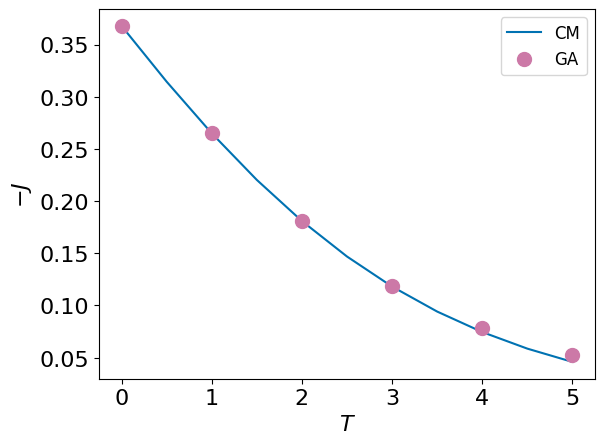

In [ ]:
N_levs = 20
Omega_S = 1.
g = 1.
beta_range = 5.
npdtype ="complex128"
beta = 5.

rho0_tuple = ("thermal", 1.)       
model_tc05 = physics_classes.model_genericAncillas(rho0_tuple, N_levs, Omega_S, 0.5, g, npdtype)
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("number", 0), [])


string_tc05 = np.array(10*[1.,1.,0.])
rho_tc05 = model_tc05.evolve(string_tc05)
TrD_tc05 = []
for i in range(11):
    TrD_tc05 += [physics_functions.trace_distance(rho_tc05[i], target_tc05)]

sol_tc05 = [TrD_tc05[0]] +[-np.loadtxt("results/genericAncillas_beta1ton0_tc05Nc" + str(Nc) +"/history")[-1] for Nc in [2, 4, 6, 8, 10]]

plt.plot([0.5*n_c for n_c in range(len(TrD_tc05))], TrD_tc05, label = "CM", color="#0072b2")

plt.plot([n_c for n_c in range(len(sol_tc05))], sol_tc05, linestyle="", marker="o", markersize=10,  label = "GA", color="#cc79a7")

plt.legend(fontsize=12)

plt.xlabel(r"$T$", fontsize = 16)
plt.ylabel(r"$-J$", fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.savefig("figure_thermalization4a.pdf", bbox_inches="tight")


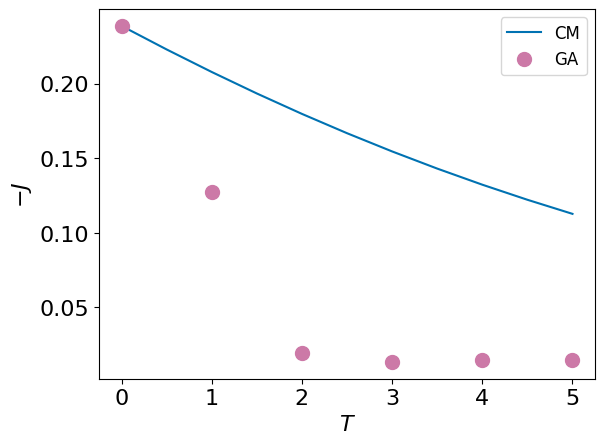

In [ ]:
N_levs = 20
Omega_S = 1.
g = 1.
beta_range = 5.
npdtype ="complex128"

rho0_tuple = ("thermal", 0.5)
model_tc05 = physics_classes.model_thermalAncillas(rho0_tuple, N_levs, Omega_S, 0.5, g, beta_range, npdtype)
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("thermal", 1.) , [])

beta = 1.
betax = (beta + beta_range)/(2.*beta_range)
string_tc05 = np.array(10*[betax])
rho_tc05 = model_tc05.evolve(string_tc05)
TrD_tc05 = []
for i in range(11):
    TrD_tc05 += [physics_functions.trace_distance(rho_tc05[i], target_tc05)]

sol_tc05 = [TrD_tc05[0]] +[-np.loadtxt("results/genericAncillas_beta05tobeta1_tc05Nc" + str(Nc) +"/history")[-1] for Nc in [2, 4, 6, 8, 10]]

plt.plot([0.5*n_c for n_c in range(len(TrD_tc05))], TrD_tc05, label = "CM", color="#0072b2")

plt.plot([n_c for n_c in range(len(sol_tc05))], sol_tc05, linestyle="", marker="o", markersize=10, label = "GA", color="#cc79a7")
plt.legend(fontsize=12)

plt.xlabel(r"$T$", fontsize = 16)
plt.ylabel(r"$-J$", fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.savefig("figure_thermalization4b.pdf", bbox_inches="tight")

In [7]:
N_levs = 20
Omega_S = 1.
g = 1.
beta_range = 5.
npdtype ="complex128"

list_to_plot = []

beta = 1.5
rho0_tuple = ("thermal", 1.)
model_tc05 = physics_classes.model_thermalAncillas(rho0_tuple, N_levs, Omega_S, 0.5, g, beta_range, npdtype)
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("thermal", beta) , [])
betax = (beta + beta_range)/(2.*beta_range)
string_tc05 = np.array(10*[betax])
rho_tc05 = model_tc05.evolve(string_tc05)
TrD_tc05 = physics_functions.trace_distance(rho_tc05[-1], target_tc05)
sol_tc05 = -np.loadtxt("results/thermalAncillas_beta1tobeta15_tc05Nc" + str(10) +"/history")[-1]
print(100*(TrD_tc05-sol_tc05)/TrD_tc05)
list_to_plot += [100*(TrD_tc05-sol_tc05)/TrD_tc05]

beta = 2.
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("thermal", beta) , [])
betax = (beta + beta_range)/(2.*beta_range)
string_tc05 = np.array(10*[betax])
rho_tc05 = model_tc05.evolve(string_tc05)
TrD_tc05 = physics_functions.trace_distance(rho_tc05[-1], target_tc05)
sol_tc05 = -np.loadtxt("results/thermalAncillas_beta1tobeta2_tc05Nc" + str(10) +"/history")[-1]
print(100*(TrD_tc05-sol_tc05)/TrD_tc05)
list_to_plot += [100*(TrD_tc05-sol_tc05)/TrD_tc05]

beta = 2.5
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("thermal", beta) , [])
betax = (beta + beta_range)/(2.*beta_range)
string_tc05 = np.array(10*[betax])
rho_tc05 = model_tc05.evolve(string_tc05)
TrD_tc05 = physics_functions.trace_distance(rho_tc05[-1], target_tc05)
sol_tc05 = -np.loadtxt("results/thermalAncillas_beta1tobeta25_tc05Nc" + str(10) +"/history")[-1]
print(100*(TrD_tc05-sol_tc05)/TrD_tc05)
list_to_plot += [100*(TrD_tc05-sol_tc05)/TrD_tc05]

beta = 3.
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("thermal", beta) , [])
betax = (beta + beta_range)/(2.*beta_range)
string_tc05 = np.array(10*[betax])
rho_tc05 = model_tc05.evolve(string_tc05)
TrD_tc05 = physics_functions.trace_distance(rho_tc05[-1], target_tc05)
sol_tc05 = -np.loadtxt("results/thermalAncillas_beta1tobeta3_tc05Nc" + str(10) +"/history")[-1]
print(100*(TrD_tc05-sol_tc05)/TrD_tc05)
list_to_plot += [100*(TrD_tc05-sol_tc05)/TrD_tc05]

beta = 3.5
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("thermal", beta) , [])
betax = (beta + beta_range)/(2.*beta_range)
string_tc05 = np.array(10*[betax])
rho_tc05 = model_tc05.evolve(string_tc05)
TrD_tc05 = physics_functions.trace_distance(rho_tc05[-1], target_tc05)
sol_tc05 = -np.loadtxt("results/thermalAncillas_beta1tobeta35_tc05Nc" + str(10) +"/history")[-1]
print(100*(TrD_tc05-sol_tc05)/TrD_tc05)
list_to_plot += [100*(TrD_tc05-sol_tc05)/TrD_tc05]

beta = 4.
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("thermal", beta) , [])
betax = (beta + beta_range)/(2.*beta_range)
string_tc05 = np.array(10*[betax])
rho_tc05 = model_tc05.evolve(string_tc05)
TrD_tc05 = physics_functions.trace_distance(rho_tc05[-1], target_tc05)
sol_tc05 = -np.loadtxt("results/thermalAncillas_beta1tobeta4_tc05Nc" + str(10) +"/history")[-1]
print(100*(TrD_tc05-sol_tc05)/TrD_tc05)
list_to_plot += [100*(TrD_tc05-sol_tc05)/TrD_tc05]

print("checks:")
print(physics_functions.thermal(5.,model_tc05.H_sys)[0,0].real)
print(TrD_tc05+np.loadtxt("results/genericAncillas_beta1tobeta4_tc05Nc" + str(10) +"/history")[-1])

99.38035719024494
99.8446786919875
99.59883552256424
92.84229314348882
52.13466396124063
26.28502827536094
checks:
0.9932620530009146
0.011859000000000001


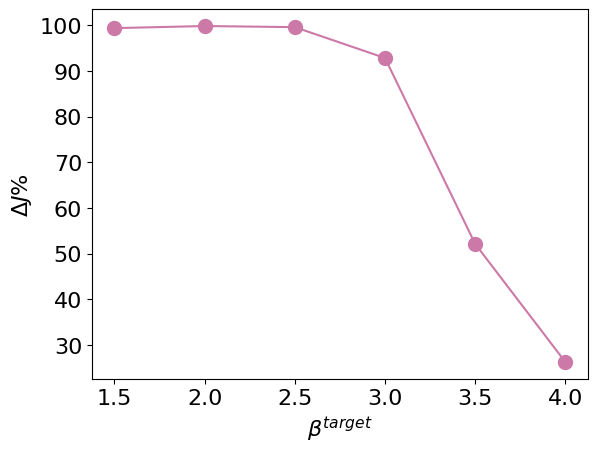

In [ ]:
plt.plot([1.5,2.,2.5,3.,3.5,4.], list_to_plot, marker="o", markersize=10, color="#cc79a7")

plt.xlabel(r"$\beta^{target}$", fontsize = 16)
plt.ylabel(r"$\Delta J \%$", fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.savefig("figure_thermalization5.pdf", bbox_inches="tight")

In [10]:
N_levs = 20
Omega_S = 1.
g = 1.
beta_range = 5.
npdtype ="complex128"

rho0_tuple = ("thermal", 1.)
model_tc05 = physics_classes.model_thermalAncillas(rho0_tuple, N_levs, Omega_S, 0.5, g, beta_range, npdtype)

beta = 2.
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("thermal", beta) , [])
betax = (beta + beta_range)/(2.*beta_range)
string_tc05 = np.array(10*[betax])
rho_tc05 = model_tc05.evolve(string_tc05)
TrD_tc05 = physics_functions.trace_distance(rho_tc05[-1], target_tc05)
sol_tc05 = -np.loadtxt("results/thermalAncillas_beta1tobeta2_tc05Nc" + str(10) +"/history")[-1]
print(100*(TrD_tc05-sol_tc05)/TrD_tc05)

beta = 3.
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("thermal", beta) , [])
betax = (beta + beta_range)/(2.*beta_range)
string_tc05 = np.array(10*[betax])
rho_tc05 = model_tc05.evolve(string_tc05)
TrD_tc05 = physics_functions.trace_distance(rho_tc05[-1], target_tc05)
sol_tc05 = -np.loadtxt("results/thermalAncillas_beta1tobeta3_tc05Nc" + str(10) +"/history")[-1]
print(100*(TrD_tc05-sol_tc05)/TrD_tc05)

beta = 4.
target_tc05 = physics_functions.init_system_state(model_tc05.H_sys, model_tc05.a, model_tc05.a_dag, ("thermal", beta) , [])
betax = (beta + beta_range)/(2.*beta_range)
string_tc05 = np.array(10*[betax])
rho_tc05 = model_tc05.evolve(string_tc05)
TrD_tc05 = physics_functions.trace_distance(rho_tc05[-1], target_tc05)
sol_tc05 = -np.loadtxt("results/thermalAncillas_beta1tobeta4_tc05Nc" + str(10) +"/history")[-1]
print(100*(TrD_tc05-sol_tc05)/TrD_tc05)

99.8446786919875
92.84229314348882
26.28502827536094
